<a href="https://colab.research.google.com/github/Varun-Ach/Malaria_Detection_CNN/blob/main/Malaria_Parasite_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Thu Oct 14 14:14:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Dataset from 
# https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [4]:
# import the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images 

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Malaria Detection/DataSet/Train'
valid_path = '/content/drive/MyDrive/Malaria Detection/DataSet/Test'

In [6]:
# Import the Vgg 19 library and add preprocessing layer to the front of VGG

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights

for layer in mobilnet.layers:
    layer.trainable = False

In [9]:
# useful for getting number of output classes
    
folders = glob('/content/drive/MyDrive/Malaria Detection/DataSet/Train/*')

In [10]:
folders

['/content/drive/MyDrive/Malaria Detection/DataSet/Train/Uninfected',
 '/content/drive/MyDrive/Malaria Detection/DataSet/Train/Parasite']

In [11]:
# our layers - you can add more if you want

x = Flatten()(mobilnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object

model = Model(inputs=mobilnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
# categorical_crossentropy because 2 categories can use binary_crossentropy for single output cases

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#Data augmentation for Training Data

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Malaria Detection/DataSet/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 421 images belonging to 2 classes.


In [18]:
training_set

In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Malaria Detection/DataSet/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
14/14 [==============================] - 277s 17s/step - loss: 1.7552 - accuracy: 0.5463 - val_loss: 0.6683 - val_accuracy: 0.6791
Epoch 2/50
14/14 [==============================] - 8s 587ms/step - loss: 0.5314 - accuracy: 0.7387 - val_loss: 0.6713 - val_accuracy: 0.6493
Epoch 3/50
14/14 [==============================] - 8s 587ms/step - loss: 0.4014 - accuracy: 0.8290 - val_loss: 0.4527 - val_accuracy: 0.7313
Epoch 4/50
14/14 [==============================] - 8s 592ms/step - loss: 0.3548 - accuracy: 0.8456 - val_loss: 0.3997 - val_accuracy: 0.7985
Epoch 5/50
14/14 [==============================] - 8s 593ms/step - loss: 0.3033 - accuracy: 0.8812 - val_loss: 0.3810 - val_accuracy: 0.8060
Epoch 6/50
14/14 [==============================] - 8s 582ms/step - loss: 0.2819 - accuracy: 0.9002 - val_loss: 0.3858 - val_accuracy: 0.7761
Epoch 7/50
14/14 [==============================] - 8s 591ms/step - loss: 0.4250 - accuracy: 0.8052 - val_loss: 0.3466 - val_accuracy: 0.8134
Epoch 

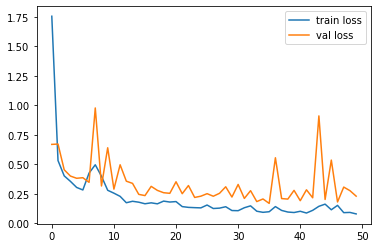

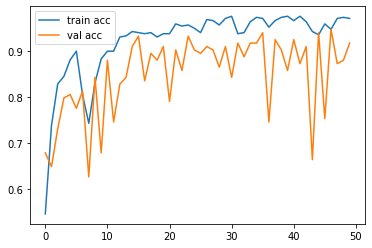

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
y_pred

array([[2.48189911e-01, 7.51810074e-01],
       [6.87180400e-01, 3.12819600e-01],
       [5.41211128e-01, 4.58788842e-01],
       [9.72977161e-01, 2.70229019e-02],
       [9.61608708e-01, 3.83913442e-02],
       [8.52148771e-01, 1.47851259e-01],
       [1.55036850e-02, 9.84496355e-01],
       [7.61343390e-02, 9.23865676e-01],
       [9.99979496e-01, 2.04490607e-05],
       [2.22252771e-01, 7.77747214e-01],
       [9.99965549e-01, 3.44896252e-05],
       [6.72793210e-01, 3.27206820e-01],
       [9.91187692e-01, 8.81231297e-03],
       [3.12495581e-03, 9.96875048e-01],
       [9.99446571e-01, 5.53412014e-04],
       [7.52109801e-03, 9.92478848e-01],
       [4.82815690e-02, 9.51718450e-01],
       [1.69154704e-01, 8.30845296e-01],
       [7.39339888e-01, 2.60660082e-01],
       [2.03472618e-02, 9.79652762e-01],
       [9.99732435e-01, 2.67543772e-04],
       [9.77077365e-01, 2.29226481e-02],
       [8.88460338e-01, 1.11539669e-01],
       [4.71105948e-02, 9.52889323e-01],
       [9.977217

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_vgg19.h5')

In [29]:
img=image.load_img('/content/drive/MyDrive/Malaria Detection/DataSet/Test/Uninfected/2.png',target_size=(224,224))

In [30]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [31]:
x.shape

(224, 224, 3)

In [32]:

x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:

model.predict(img_data)

array([[5.101473e-06, 9.999949e-01]], dtype=float32)

In [35]:

a=np.argmax(model.predict(img_data), axis=1)

In [36]:

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [37]:
img=image.load_img('/content/drive/MyDrive/Malaria Detection/DataSet/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png',target_size=(224,224))

In [38]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [39]:
x.shape

(224, 224, 3)

In [40]:
x=x/255

In [41]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [42]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[6.5555241e-06, 9.9999344e-01]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [46]:
if(a==0):
    print("Uninfected")
else:
    print("Infected")

Infected
